In [1]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\berns\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\berns\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\berns\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
rafi ="""THE UNIVERSITY OF CHICAGO
The Truth is No Defense:
The Ku Klux Klan and the News in 1920s Indiana
By
Rafael Abrahams
August 2018
A paper submitted in partial fulfillment of the requirements for the
Masters of Arts degree in the
Master of Arts Program in the Social Sciences
Faculty Reader: Amy Dru Stanley
Preceptor: John McCallum
Twice in the 1920s, the small city of Muncie, Indiana, population 38,000, found itself thrust
under the spotlight of national prominence. In 1929, the sociologists Robert and Helen Lynd
published Middletown: A Study in Contemporary American Culture, a groundbreaking work that
purported to analyze and quantify the life of an average American city. Middletown portrayed
Muncie as a representative microcosm of the United States, and diagnosed the ills of the
industrial age-- corrupt politics, hollowed out religious life, a bought-and-paid-for press-- as the
consequences of voracious capitalism.1 Middletown became a surprise best-seller, garnering
praise from academics, public intellectuals, and lay readers alike, and reshaping the field of
sociology for years to come. Indeed, a generation of sociologists and advertisers bought into the
myth of Muncie's typicality, and considered Middletown a window into the heart of normal
American life.2
Three years prior, Muncie appeared in newspapers around the country painted in quite a
different light, as a town where American civic values were under the threat of an abnormal
assailant: the Ku Klux Klan. In 1923, editor George R. Dale published an article in his weekly
paper, the Muncie Post-Democrat, alleging that the local county judge was a member of the Klan
and had packed juries with Klansmen, and the judge convicted him of contempt of court. In
1926, after appealing his case, the Supreme Court of Indiana upheld Dale's conviction. Dale’s
guilty verdict was predicated on the Indiana judges’ holding that the “Truth is No Defense”-- the
mere act of alleging corruption in the courts was found illegal, irrespective of the claim’s
veracity.3
 Coverage of the Dale trial depicted Muncie as a battleground where the American
1 Robert and Helen Merrell Lynd, Middletown: A Study in Contemporary American Culture (New York, NY:
Harcourt, Brace, and Company, 1929), 315, 414-415, 471-472.
2 Sarah Igo, The Averaged American: Surveys, Citizens, and the Making of a Mass Public (Cambridge, MA:
Harvard University Press, 2007), 68-75.
3 “Editor, Victim of Klan Justice, Loses His All.” Chicago Daily Tribune, 9 July, 1926.
1
institution of the free press was under siege precisely because of the atypicality of the Ku Klux
Klan and its repressive regime.
While Middletown exposed many crooked elements of civic life in Muncie, the Klan
occupied only a marginal presence in the Lynds' analysis, and the Dale trial went entirely
unmentioned. This paper examines the meaning of this lacuna-- what was at stake for the Lynds
in writing Middletown, and what message did they hope to convey through their work? Why did
the Lynds as sociologists understand Muncie differently than Dale did as a journalist, and what
does this tell us about the strengths and limitations of these two disciplines? If we think of the
sociological study as a news medium, then what aspects of American life did Middletown present
as new, and why was the Klan not among them?
These questions take on greater significance when we consider the intellectual climate of
the 1920s, particularly the work of the philosopher John Dewey. In 1927, Dewey published The
Public and Its Problems, which expressed a fear of the insufficiency of public discourse for the
operation of democracy. While newspapers were printed en masse and widely available, their
contents were often trivial and sensational. A nation of newspaper readers did not guarantee an
informed public equipped to make measured, considered decisions at the polls; rather, the
public's information and opinions were tainted by the pecuniary interests of the advertisers and
sponsors who funded their news sources.4
 Dewey, who taught Robert Lynd at Columbia
University, saw in his student's magnum opus a solution to this quandary: Middletown was an
impartial, scientifically rigorous study free from the newspapers' pandering to advertisers, and
simultaneously a popular and enjoyable read for regular folks who resided far beyond the ivory
4 John Dewey, The Public and Its Problems (Denver: Henry Holt and Company, 1954), 179-181.
2
tower.5
“'News,'” Dewey explained in The Public, “signifies something which has just happened,
and which is new because it deviates from the old and regular.”6 Middletown and the Muncie
Post-Democrat were two parallel purveyors of “the news,” each with a different perspective on
“the old and regular.” As sociologists who distanced themselves from journalism, the Lynds'
medium was new in itself: an impartial, expert opinion on social trends in an industrializing
small city. As for their message, the Lynds reported that over the past thirty years, business
interests had effectively consigned working class Hoosiers to an impotent politics and a barren
culture-- and because Middletown represented the country at large, its residents were stand-ins
for average Americans nationwide. In contrast, Dale's vision of the news fit neatly within the
realm of traditional journalism. Unlike the Lynds, Dale maintained faith that the newspaper
could speak truth to power without crumbling under the weight of advertisers' agendas. As the
editor of a local politically-minded weekly, Dale made it his business to report events that
disrupted civic values and warn his community of eminent threats to their liberties. In the mid1920s, the Klan rose to power in Muncie. While Dale scribbled urgently about the KKK, the
Lynds barely noticed the white hoods on their radar.
In 1929, sociology was a relatively young academic discipline. Previous social surveys of
the late nineteenth and early twentieth centuries tended to focus on populations understood as
problematic, like immigrants, working girls, and black migrants. Landmark studies like Jane
Addams and Florence Kelley’s 1895 Hull-House Maps and Papers, W.E.B. Du Bois’s 1899 The
Philadelphia Negro, and Paul Kellogg’s 1909-1914 Pittsburgh Survey series sought to make
5 John Dewey, Individualism Old and New (New York: Minton, Balch & Company, 1930), 9-18; Igo, 32.
6 Dewey, The Public and Its Problems, 179-181.
3
sense of the emergent social ills of industrial capitalism and urban life, like poverty, crime, and
pollution. Middletown departed from this model by investigating Muncie, Indiana-- in the Lynds’
view, a “representative,” mainstream community-- as proxy for the nation writ large. As Sarah
Igo explains in The Averaged American, “The Lynds’ quarry was not the problematic or
particular but the normal and the whole, and the scope of their conclusions was much more
sweeping than that of any other contemporary survey.”7
To accomplish this goal, the Lynds drew inspiration less from social surveyors than from
anthropologists. In a private notation, Robert wrote that his intention in writing Middletown was
to occupy the role of “naive observer” and thus “look at the life of a city objectively.” This was
easier said than done considering the Lynds’ upbringing-- though they were educated in the
Northeast and resided in New York City before departing for Muncie, Helen was a native of
Illinois, and Robert, of Indiana. Robert even conceded that “the ideal person for this job w’d
have been a Chinese anthropologist.”8 Yet they insisted that they could treat their former
neighbors with the same detachment that their English contemporary A. R. Radcliffe-Brown held
in his study of the “fundamental human activities” of his Aboriginal subjects in Australia.9
Taking a page from Radcliffe-Brown’s work, Middletown boiled down “all the things people do”
into six categories: “Getting a living. Making a home. Training the young. Using leisure in
various forms of play, art, and so on. Engaging in religious practices. Engaging in community
activities.” The Lynds acknowledged the distaste that a reader might have for discussing their
own lifestyles with the same dispassion and candor typically reserved for “an Arunta village in
central Australia,” but asserted that this approach was necessary to gain a “clearer vision” of
7 Igo, 25-29.
8 Ibid., 27.
9 Ibid., 38.
4
contemporary society: “Nothing can be more enlightening than to gain precisely the degree of
objectivity and perspective with which we view ‘savage’ people.”10
The Lynds committed to studying Muncie because by their calculations, it was the locus
of American normalcy. In the introduction to Middletown, the sociologists explained their two
primary criteria for choosing a model city: it should be “as representative as possible of
contemporary American life,” and also “compact and homogeneous enough to be manageable in
such a total-situation study.” To achieve the former qualification, the Lynds outlined seven
subcategories their subject city must meet: a temperate climate; a rapid rate of economic growth
to insure “a plentiful assortment of the growing pains accompanying contemporary social
change”; an industrial culture centered on “high-speed machine production”; the absence of a
single, dominating plant; a local, self-contained artistic life, not like a college town that might
import music and lectures; the absence of “any outstanding particularities or acute local
problems” that would nullify its representativeness; and finally, a geographic location within
“that common-denominator of America, the Middle West.”11 The summation of these criteria
yields a vision of “contemporary American life” to be one of a local, independent people
rehashing their customs and traditions under the shadow of industrial transformation. This vision
follows Robert Lynd’s personal history and previous pursuits-- in 1922, while serving as a
student preacher in the Standard Oil workers’ camp in Elk Basin, Wyoming, he published a
muckraking account of the camp’s working and living conditions in Harper’s and the Survey.12
10 Lynd, 4-5.
11 Ibid., 7-8.
12 Igo, 33.
John D. Rockefeller, Jr., the magnate behind Standard Oil, also bankrolled Middletown through a Protestant
philanthropic project, the Institute for Social and Religious Research, or ISRR. Middletown was originally
conceived in 1923 as “A Study of the Socio-Religious Influences and Agencies of a Small City and the Attitudes
of the People toward Them,” and was intended to analyze and aid Protestant churches’ responses to industrial
life-- a small, specific focus not unlike those of the social survey projects of Addams, Du Bois, and Kellogg
5
For the Lynds, American normalcy in the 1920s meant a culture reckoning with the forces of
urbanization, industrialized labor, and capitalist consumerism.
However, this vision of normalcy comes into conflict when we consider the ramifications
of the Lynds’ second criterion in choosing a city, namely the compactness and homogeneity
necessary for it to be manageable as the subject of their study. The authors defined this
qualification of manageability with three subcategories: a population between 25,00 and 50,000
as per the 1920 census; geographical and economic self-containedness, i.e. the exclusion of
satellite cities; and “a small Negro and foreign-born population.” The Lynds explained their
rationale for this last category as pragmatic: “Instead of being forced to handle two major
variables, racial change and cultural change, the field staff was enabled to concentrate upon
cultural change.”13
While the authors acknowledged that such a “homogeneous, native-born population...is
unusual in an American industrial city,” they did not consider two significant ramifications of
representing such an aberrant town as the paradigm of normalcy. First, the Lynds omitted the fact
that Muncie’s homogeneity was unusual not only in the United States, but especially so in the
“common-denominator of America,” where its 88 percent “old stock” population was higher than
any other city of its size in the Midwest apart from Robert Lynd’s birthplace, New Albany,
Indiana. Muncie’s typicality was rooted more deeply in nostalgia than in data-- a predominantly
discussed above. When the Lynds produced a very different manuscript in Middletown, the ISRR refused to
publish it, but did release it to its authors who found a willing publisher in Alfred Harcourt. See Igo, 30-35.
In The Origins of American Social Science, Dorothy Ross explains that the Rockefellers funded social
science projects in the 1920s to combat the criticism that their industrial capitalism frequently garnered. They
were careful, however, to tow a narrow line that Middletown apparently crossed: “[The Rockefellers] wanted to
help solve social problems in a way that would spare the family name controversy and would spare the country
more radical changes.” See Dorothy Ross, The Origins of American Social Science (New York: Cambridge
University Press, 1991), 400.
13 Lynd, 8.
6
white native population was more emblematic of preindustrial America than the 1920s milieu
that the Lynds intended to deconstruct, and better portrayed in works of fiction like Sinclair
Lewis’s 1920 Main Street and 1922 Babbitt than in reality. Second, the Lynds’ separation of
“racial change” and “cultural change” elided the interconnection between the two, and as Igo
notes, this distinction “did not lead them to an understanding of ‘contemporary American culture’
as built upon certain groups’ systematic exclusion from it.”14
The systematic exclusion of minority groups from mainstream culture was the raison
d’etre of another presence in 1920s Muncie: the Ku Klux Klan. Because the Lynds overlooked
white Protestant exclusivity as a central feature of Muncie’s cultural life, they were not able to
develop a coherent framework with which they might understand the role of the Klan in civic
society. Middletown’s chapter on “The Organization of Leisure” includes statistics on the
business and working class husbands and wives’ membership in clubs and lodges and a footnote
acknowledges the Klan’s qualification as a lodge, yet the chapter’s discussion of groups like the
Rotary Club, Masons, and YMCA never extends into the inner sanctums of the Klan.15 The Klan
does receive cursory treatment in the book’s final chapter, “Engaging in Community Activities,”
as an example of a phenomenon of “Things Unmaking Group Solidarity,” but it is inaccurately
portrayed as a “tornado” with a “brief career” in Muncie, and therefore not significant enough to
disqualify Muncie based on the criterion mentioned above as a town without “any outstanding
particularities or acute local problems.”16 In choosing the predominantly white Muncie as their
Middletown and refusing to address interracial relations, the Lynds obscured the stakes of the
Klan's white supremacist platform and rendered their impact on civic life negligible.17
14 Igo, 57.
15 Lynd, 308.
16 Ibid., 481; 7.
17 Recent scholarship has sought to fill the gap left by the Lynds' neglect of Muncie's nonwhite, non-Christian
7
Robert and Helen Lynd and their three research assistants arrived in Muncie in January
1924 and completed their manuscript in the spring of 1927, meaning they resided in the city at
the height of Ku Klux Klan membership and of the Klan’s domination of local politics. It is
curious, then, that the Muncie Klan received scant attention in the appropriate sections of
Middletown, namely “The Organization of Leisure,” “Religious Observances,” and “The
Machinery of Government.” A close reading of these chapters shines a light on the ramifications
of the omission of the Klan, and contemporary historiography of the Klan complicates the book’s
construction of the “normal” and the “new.”
Middletown presented leisure as a false respite from the grinding demands of industrial
capitalism. At the top of their chapter on “Using Leisure,” the Lynds wrote: “In contrast to more
strictly marshaled pursuits, such hours are called ‘leisure time,’ and this precious time, quite
characteristic in a pecuniary society, is ‘spent.’”18 A section titled “The Organization of Leisure”
delved into the ways that Middletown citizens associated with one another, and considered the
influence of institutions of the neighborhood, the church, and the club in the formation of
friendships and social gatherings. The Lynds devoted much of their attention to the dissection of
club, lodge, and union membership across the axes of class and gender, and concluded that the
primary influence of social societies such as these was the ossification of class identity: “In view
of the tightening of social and economic lines in the growing city, it is not surprising that the type
of leisure-time organization which dominates today tends in the main to erect barriers to keep
others out.”19 While the Lynds recognized the role of exclusion as the basis of community, their
populations: See Middletown Jews: The Tenuous Survival of an American Jewish Community, ed. Dan
Rottenberg (Bloomington: Indiana University Press, 1997) and The Other Side of Middletown: Exploring
Muncie's African American Community, ed. Luke Lassiter (Walnut Creek, CA: Alta Mira Press, 2004).
18 Ibid., 225.
19 Ibid., 312.
8
focus was strictly on class rather than race or faith.
Recent scholarship of the 1920s Klan recognizes its appeal to a cross section of
Americans that transcended class barriers. In The Second Coming of the KKK, Linda Gordon
chronicles the Klan’s tradition of hosting large festive carnivals that welcomed families of all
types: “[Klan pageants were] typically staged in the summer, often on Independence Day, and
outdoors...Open to everyone, located in fairgrounds, public parks, and donated private fields,
they were announced in newspapers, handbills, and posters tied to trees far enough in advance
that word spread widely.” As “family affairs” featuring “respectable entertainment and
participatory activities for people of all ages” like music, ball games, and hot air balloon rides,
Klonvocations attracted up to tens of thousands of attendees, and often converted leisure-seekers
into members of the order. Gordon cites the Klan’s reported numbers of “mass naturalizations” at
their pageants: 4,560 initiates at a 1922 Chicago event; 7,000 in Dayton in 1923. While she
includes a caveat-- “no doubt these are exaggerated figures”-- this presentation of the Klansponsored leisure events as both an enticing locus of entertainment and a welcoming entry point
into a social organization contradicts the Lynds’ assertion of the lodge as an insular, divisive
institution.20The Klan was of course an exclusive club that thrived on the marginalization of nonmembers, but within its ranks, white Protestants of a variety of backgrounds socialized and
networked peaceably.
In a similar vein, Middletown treated religious practice as a bland, ideologically empty
social phenomenon. The Lynds interviewed Muncie residents on what it meant to be a Christian;
they reported that “[interviewees] inclined at first to think the questioner was joking, a condition
20 Linda Gordon, The Second Coming of the KKK: The Ku Klux Klan of the 1920s and the American Political
Tradition (New York: Liveright, 2017), 80-81.
9
reflecting the general tendency to accept ‘being a Christian’ as synonymous with being
‘civilized’ or ‘an honest man’ or ‘a reputable citizen.’”21 Much of the argument in Middletown’s
chapter on “Engaging in Religious Practices” centered on the discrepancy between the vast
majority of citizens’ nominal adherence to the Christian faith and their conflicting theologies and
spotty records of church attendance. Again, the Lynds turned to statistics to prove their findings:
Although the tradition is that “everyone goes to church,” a check of attendance at the services of the
forty-two religious bodies during the four-week period from October 26 to November 22, 1924, shows
that an average of only eleven males in each 100 of the white male population and eighteen females in
each of 100 white female population attended Sunday morning church services on each of the four
Sundays.22
The Klan was mentioned in this section as a factor that kept people away from church. One
parent suggested that the Klan tainted the meaning of Protestantism: “I used to be Catholic and
wish I’d brought my children up Catholics since this Klan disturbance.” Another interviewee
resented sharing their church with Klansmen: “This church over here is just full of Klan
members, and I just ain’t got any use of the Klan.” Regarding a third resident the Lynds simply
wrote, “And one is kept from the Catholic church by fear of the Klan.”23
One aspect of religious life that Middletown did not consider was the spiritual nature of
the Klan itself. While the Klan was a force that drove Catholics as well as resistant Protestants
away from church, it also catalyzed its own members’ church attendance and engagement in
religious practice. Kelly Baker’s Gospel According to the Klan portrays Protestantism as an
essential feature of Klan ideology and a reason for the order’s immense popularity: “Klansmen
and Klanswomen avidly promoted their affiliation within Protestantism....Christianity played an
essential part in the collective identity of the order.” Christianity was a prominent trope of Klan
21 Lynd, 315.
22 Ibid., 358.
23 Ibid., 364-366.
10
rhetoric, and “religious faith washed over the pages of Klan newspapers, fictional books,
pamphlets, and speeches.”24 Religion was considered something to be practiced in private at
one’s home or in the Klavern, but also in regular, public churches. According to Baker, “one of
the foremost duties of the Klansman [was] to worship God...The Klan transformed men into
inspired members who were good, churchgoing citizens.”25 In focusing on the trend of
Middletown residents’ religious disenchantment and decrease in church attendance, the Lynds
missed the story of the Klan’s influence in re-enchanting a community into committed
churchgoers.
As with leisure and religion, Middletown portrayed the civic institution of politics as
meaningless and corrupt, a reaffirmation of the economic supremacy of the business class. The
Lynds characterized the 1924 election as “a matter of lining up on one side or the other of an
either-or situation” in which there has emerged “a tendency toward obliteration of distinctions”
between the two regnant political parties. Voters cast their ballot for particular candidates not out
of an admiration of their political platform or character, but strictly due to party membership. A
citizen’s affiliation to his or her party was ultimately arbitrary, passed down as a matter of
lineage following “the accident of birth into one camp or the other.”26 Most Middletown residents
regarded politics with “apathy or repugnance,” and thus political leaders garnered little respect
and bore no real influence: “Today the mayor, the judge, and the councilman are no longer
dominant figures; their position of prestige has tended to be taken by business men, and
‘business and politics don’t mix.’”27 The result of this arrangement was the alienation of the
24 Kelly Baker, Gospel According to the Klan: The KKK's Appeal to Protestant America, 1915-1930 (Lawrence,
KS: The University Press of Kansas, 2011), 18.
25 Ibid., 63.
26 Lynd, 414-415.
27 Ibid., 421.
11
citizenry from the creation of the laws that govern it, and the replacement of democratic
participation with a blind faith in the political status quo and the leadership of business elites:
“Middletown people are tending to increasingly delegate their interests, while they busy
themselves with more pressing and immediate concerns.”28
On the ground, however, the 1924 election in Indiana played out as anything but politicsas-usual. Klansmen showed up in droves to 1924 Republican Party state convention in
Indianapolis and effectively voted out non-members from the electoral slate.29 The Klan’s sudden
and near-complete envelopment of the Republican party represented a significant distortion of
the normal operation of party politics.30 As Leonard Moore writes in Citizen Klansmen, “Whether
individual Republican politicians applauded or objected to the Klan’s presence in politics, none
could ignore its importance, and in an uncertain political climate, many would be forced to seek
its support.” The Klan urged its members to vote down the Republican ticket, and the effect of
this organizing effort was a “shocking political victory” for the GOP: “[Edward] Jackson was
elected governor along with almost an entire slate of Klan-endorsed candidates for other state
offices...Politicians who alienated the Klan suffered near-complete failure.”31 In Middletown, the
Lynds confronted a Republican-aligned “leading club woman” about her decision to vote for “a
Klansman, accused of political corruption,” and suggested that the candidate’s party affiliation
outweighed the stigma of his hood and robe: “[She] replied, with a touch of asperity, ‘I am going
to vote a straight Republican ticket. I have always been a Republican and that’s just the way I
28 Ibid., 434.
29 Kenneth Jackson, The Ku Klux Klan in the City, 1915-1930 (New York: Oxford University Press, 1967), 155.
30 The 1920s Klan is primarily associated with the Democratic Party, and is notorious for the smear campaign it ran
against Al Smith, New York's Catholic governor, at the 1924 Democratic Party national convention in New York
City. However, the Klan's party affiliation varied regionally; in Indiana, the Klan dominated the Republican
party, as discussed in greater detail above. See Gordon, 166-167.
31 Leonard Moore, Citizen Klansmen: The Ku Klux Klan in Indiana, 1921-1928 (Chapel Hill: The University of
North Carolina Press, 1991), 151-152.
12
vote.’”32 However, this particular voter was not necessarily representative of her peers: many
Indiana voters chose Klan candidates because of their identity as Klansmen, not in spite of it.
According to Moore, “In 1924 the Klan had been the central issue in Indiana politics and the
Klansmen had emerged victorious.”33
After eliding the influence of the Klan in the realms of leisure, religion, and politics, the
Lynds finally acknowledged the order's presence in Muncie in the final section of Middletown, “Things Making and Unmaking Group Solidarity.” In this section the Lynds chronicled the
Klan's rise and fall: the order was originally “brought to town...by a few of the city's leading
business men as a vigilance committee” until “its ranks were quickly thrown open under a
professional organizer, and by 1923 some 3,500 of the local citizens are said to have joined.”
After this explosion in membership, “the business men withdrew, and the Klan became largely a
working class movement.” The Klan was defined by its “militant Protestantism” that manifested
in the form of “tales against the Catholics” and “Negro and Jewish hatred.” The Lynds filled a
brief three pages with quotations from Klansmen, and then concluded their analysis with an
explanation for the order's initial attraction, rapid growth, and sudden decline:
[The Klan] afforded an outlet for many of the constant frustrations of life, economic tensions and social
insecurity, by providing a wealth of scape-goats against whom wrath might be vented...The high tide of
bitterness was reached in 1923, and by 1925 the energy was mainly spent and the Klan disappeared as a
local power, leaving in its wake wide areas of local bitterness.
Immediately following this explanation is a discussion of the fervor surrounding the Middletown
College basketball team. In contrast to the Klan, a “thing unmaking group solidarity,” the
Bearcats inspired togetherness and the transcendence of difference: “North Side and South Side,
Catholic and Kluxer, banker and machinist-- their one shout is 'Eat 'em, beat 'em, Bearcats!'”34
32 Lynd, 415.
33 Moore, 152.
34 Lynd, 478-485.
13
The Lynds presented the Klan as little more than a fad, a temporary manifestation of
“bitterness” that came and left the town in a hurry, easily overcome when “Catholic and Kluxer”
came together in support of their beloved student athletes. In this version of history, the Klan was
merely another fandom, a meaningless diversion for frustrated laborers no more significant than
a basketball game. In truth, the Klan had a far more powerful and sinister legacy: it was a force
that incited physical violence, political corruption, religious prejudice, and economic warfare. In
Muncie, the brunt of its wrath was endured by a local, small-time journalist who fell victim to
the corruption that he dared to expose.
George R. Dale was born in 1867, the son of a lawyer and a third-generation Hoosier.
Dale was interested in the newspaper business from a young age and held editorial positions at a
number of local Indiana papers until 1921, when he established the weekly Muncie PostDemocrat, the only Democratic Party-affiliated paper in the predominantly Republican Delaware
county. The Post-Democrat became Dale’s life’s work, and he wrote and edited for the paper
until his death in 1936.35 Dale used his platform to expose crime, corruption and injustice in
Muncie, and was not afraid to make enemies; he frequently reported personal affronts to him and
his family from his political opponents, including harassment, threats, physical violence, and the
planting of false evidence in his office. When the Ku Klux Klan came to Muncie in 1922, the
organization quickly became the focal point of the Post-Democrat’s reporting, and Dale filled his
paper every week with editorials satirizing Klan customs and exposing local politicians and
businessmen as Klansmen.36
35 “George R. Dale,” Indiana, One Hundred and Fifty Years of American Development, ed. Charles Roll (Chicago:
Lewis Publishing Company, 1931); “George R. Dale, Enemy of the Klan, Dies of Stroke,” Washington Post, 28
March, 1936.
36 Ron Smith, “The Klan’s Retribution Against an Indiana Editor: A Reconsideration,” Indiana Magazine of
History, Volume 106, Issue 4 (2010), 381-400.
14
Dale’s personal troubles reached a tipping point in 1923 when he was arrested and
indicted for possession and sale of alcohol. The editor was known as a dry man, and he published
an editorial in his paper explaining his innocence: he had been meeting with a former bootlegger,
a valuable source from the Muncie underworld, in a lawyer’s office; when the police burst in the
room, they discovered no liquor and fabricated a story to justify his arrest. He also asserted that
the police, the grand jury, and Delaware county circuit judge Clarence Dearth were Klan
operatives. Dearth retaliated to the article by charging Dale with indirect contempt of court, and
sentenced him to a $500 fine and ninety days on the state penal farm. When Dale appeared in
court and insisted that his published allegations were true, Dearth charged him with direct
contempt, and doubled Dale’s sentence.37 Dale appealed the case to the Indiana Supreme Court,
and worked on the penal farm for two days in the interim before his appeal was approved. Three
years later, Dale earned his chance in court again.
On July 9, 1926, the Chicago Daily Tribune published a breaking story from Muncie,
Indiana titled “Editor, Victim of Klan Justice, Loses His All.” Journalist Orville Dwyer opened
the article with a provocative lede: “George R. Dale, militant editor of the Post-Democrat,
fighting weekly of this town, is about to be sacrificed on a fiery cross-- a victim of the Ku Klux
Klan.” The story went on to chronicle Dale’s background as newspaper editor and victim of Klan
harassment and violence, and his legal journey from his indictment for bootlegging to his
indictment for contempt of court to the most recent development, the affirmation of his charge by
the Supreme Court of Indiana. The article concluded with the assertion of William Rooker,
Dale’s attorney, that Dale’s original sentences for bootlegging and contempt were unlawful
because they were delivered by a court wholly owned by the Klan, “a supergovernment not
37 “George R. Dale, Indiana Foe of the Klan, Dies at 69,” New York Herald Tribune, 28 March, 1936.
15
based on any law.” Rooker charged that Dearth was in fact “not a judge of the court because his
klan oath superseded his oath of office.”38
In the months that followed, Dale’s story was picked up by major presses across the
country. The Los Angeles Times published Dwyer’s piece in full under the title “Editor Martyred
to Fiery Cross”; the Baltimore Sun ran an editorial condemning Dale’s sentence as “a
monstrosity of the law”; the New York Times covered Dale’s appeal to the U.S. Supreme Court;
the Washington Post highlighted the upcoming Supreme Court case and Rooker’s anticipated
arguments; and even the China Press, an English-language newspaper published in Shanghai, ran
a story on the controversy.39 Dale’s trial was not merely a story of local politics and corruption at
the court, but a battleground in the war for freedom of the press. Much of the ink spilled on the
Dale saga centered around the Indiana Supreme Court’s contentious dismissal of Dale’s offer to
prove the truth of Dearth’s involvement in a Klan plot to jail him. When it comes to contempt,
the Court held, “the truth is no defense.”
Dale’s newfound fame began to attract the aid of powerful allies sympathetic to his cause.
On July 10, Dale’s case was taken up by the American Civil Liberties Union, who offered to
finance the legal costs of an appeal to the United States Supreme Court, and to provide additional
legal counsel through the aid of one of their own attorneys.40 In January 1927, the Court
38 “Editor, Victim of Klan Justice, Loses His All.” Chicago Daily Tribune, 9 July, 1926.
Rooker's argument represented an ironic inversion of Klan anti-Catholic rhetoric. Klansmen insisted that
Catholics could never be fully invested Americans because of their allegiance to a foreign leader, i.e. the pope.
(See Gordon, 27.) Rooker cleverly hoisted Klansmen by their own petard by describing Klannishness as an antiAmerican affiliation.
39 “Editor Martyr to Fiery Cross,” Los Angeles Times, 11 July, 1926; “Indiana's Sentenced Editor,” Chicago Daily
Tribune, 5 July, 1926 (Reprinted from The Baltimore Sun); “Klan Enemy Gets Appeal,” New York Times, 20
July, 1926; “Great Corporation Test Opening Case of Supreme Court,: The Washington Post, 3 October, 1926;
“For Killing A Man-- No Penalty; For Criticizing A Judge-- 90 Days,” The China Press, Shanghai, 24 August,
1926.
40 “Civil Liberties Union Will Aid Dale’s Defense,” Chicago Daily Tribune 11 July, 1926; “Dale Accepts Help to
Fight Press Muzzle,” Chicago Daily Tribune, 12 July, 1926. 16
dismissed Dale’s case on technical grounds because Dale did not furnish the court with a printed
account of his Indiana case by the appropriate time.41 The next month, Dale appeared before the
Supreme Court with yet another high-profile attorney by his side, former Senator Moses E.
Clapp of Minnesota, and introduced a motion to reinstate the case. By April, however, Clapp
advised the Court to dismiss the case, and the Court complied.42 The question of whether truth
superseded the charge of contempt of court would have to wait for a later date for an answer
from the nation’s highest court.43
In the meantime, Dale got himself deeper into trouble with Judge Dearth and the Indiana
minor courts. On February 19, the Muncie Post-Democrat published an anonymous letter
charging Dearth for tolerating and the operation of gambling-houses and saloons in Muncie, and
for not using his power to impeach the allegedly corrupt Mayor John C. Hampton. Dearth
responded by indicting Dale on counts of contempt and libel without the procedure of a trial or
the decision of a jury, and placed an order for Dale’s arrest upon his return to the state.44 The
judge also ordered the Muncie police to prevent the sale of the issue in question, and to
confiscate all copies of the paper from the hands of newsboys.45 Dale fled the state for
Greenville, Ohio to avoid arrest and continued to publish his paper in absentia, directing its
publication over telephone to his wife.46 At the end of March, Dale’s son fell ill and the editor
41 “Anti-Klan Editor’s Appeal is Dismissed By Supreme Court for Delay in Records,” New York Times, 4 January,
1927.
42 “Cancels Dale Appeal to Supreme Court” New York Times, 26 April, 1927. 43 Dale's 1926 trial and 1927 appeal occurred directly in between two significant Supreme Court cases concerning
freedom of the press, namely Gitlow v. New York in 1925 and Near v. Minnesota in 1931. Gitlow upheld New
York's suppression of radical Marxist speech but declared that the Fourteenth Amendment protects First
Amendment rights within the states; Near struck down Minnesota's libel law and found prior restraint of the
press unconstitutional. See Paul Starr, The Creation of the Media: Political Origins of Modern Communications
(New York: Basic Books, 2004), 291.
44 “Arrest of Dale Ordered,” New York Times, 20 February, 1927.
45 “Nine Witnesses Accuse Dearth As Trial Begins,” New York Times, 23 March, 1927.
46 “Dale Issues Paper After Suppression,” New York Times, 26 February, 1927.
17
returned to Muncie; he was arrested in his home on the charge of criminal libel and held in jail
on a $3,000 bond.47
By the end of the year, Dearth and Dale’s fates were reversed. Dearth had taken a step too
far in banning and confiscating the Post-Democrat. On March 9 the judge was impeached by a
majority of members of the Indiana House of Representatives, though the vote came two votes
shy of the two-thirds supermajority needed to remove him from office.48 Still, the Dearth
impeachment capped off an ignominious episode in the history the Indiana Klan, and the
corruption scandal surrounding the judge helped to sink the Klan’s reputation in the state. 49 Dale
on the other hand earned the admiration of the public, both locally and throughout the nation.
After serving two days in jail following his libel conviction, the editor was pardoned of all
charges by Governor Ed Jackson.50 In a bit of irony, Jackson was a Klan-affiliated candidate
swept in to office by the KKK Republican bloc in the 1924 election; perhaps he pardoned Dale to
salvage his reputation in the wake of Dearth and the Klan’s demise.51 Dale went on to run for
mayor of Muncie; he was elected in 1929 and served for four years. His first act of office was to
purge all forty-two members of the police department and ten firemen, and thus usher in a new
age in Muncie’s civic office, clean of all remnants of the Klan past.52
Dale was embroiled in one last bout with the courts when he was convicted for
bootlegging once again in June 1932, while serving as mayor. Again, the editor addressed the
charges in his paper and dismissed them as fabricated by his political opponents. President
47 “Editor Dale Arrested in Libel Fight” Los Angeles Times, 1 April, 1927.
48 “Muncie Editor’s Foe Impeached,” Los Angeles Times, 10 March, 1927; “Fail to Reach Vote on Dearth
Impeachment,” Chicago Daily Tribune, 1 April, 1927.
49 Moore, 182.
50 “The Life and Times of George Dale, Muncie Mayor and Editor,” Ball State University Archives and Special
Collections, 2003.
51 Moore, 151.
52 “The Life and Times of George Dale, Muncie Mayor and Editor,:
18
Franklin Roosevelt pardoned Dale in December 1933, but the episode damaged his reputation
and likely contributed to his failed reelection bid the following year.53 Dale died of a stroke in
1936, and he was celebrated as a “Foe of the Klan” and “Militant Editor” in obituaries printed
throughout the country.54
 While writing Middletown, the Lynds were without a doubt aware of Dale's acute focus
on the Klan through his paper, and of his legal battle with Judge Dearth. In the March 31, 1927
issue of the Muncie Post-Democrat, just before Dearth escaped impeachment, Dale ran an article
titled “What Muncie Pastors Think of Dearth” that included this quotation:
Then the minister said that a few years ago when Robert S. Lynd was sent to Muncie to conduct an
investigation for the Institute of Social and Religious Research, which had selected Muncie as a typical
American city, Mr. Lynd had four investigators working for him. “And he told me that Judge Dearth’s
court was so rotten it stinks to high heaven,” the minister testified.55 Middletown would not come out for another two years, and Robert Lynd was known to Muncie
residents not as a nationally renowned scientist, but as a friendly neighbor-- Igo notes that the
Lynds were not detached from civic life but “made themselves members of the community” to
the point that Robert “regularly [sang] solos in the local church.”56 There is little reason to
imagine that the minister made up this story, and as a staunch proponent of democracy and critic
of corruption, it is likely that Lynd supported Dale's side in the trial. Yet the remarkable saga of
Judge Dearth, George Dale, and the “Truth Is No Defense” case makes no appearance in
Middletown, a sociological study meant to analyze a typical American town absent of “any
outstanding particularities or acute local problems.”
53 Ibid.
54 “George R. Dale, Enemy of the Klan, Dies of Stroke,” Washington Post, 28 March, 1936; “Gorge Dale Dies, Ku
Klux Klan Foe,” New York Times, 28 March, 1936; “George R. Dale, Indiana Foe of the Klan, Dies at 69,” New
York Herald Tribune, 28 March, 1936.
55 “What Muncie Pastors Think of Dearth,” Muncie Post-Democrat, 31 March, 1927.
56 Igo, 42.
19
The conflicting stories of 1920s Muncie presented by Middletown on the one hand and
the Muncie Post-Democrat on the other can be attributed to their authors' differing conceptions
of the “new.” As social scientists, Robert and Helen Lynd set out to chronicle and analyze
changes in the life of the Muncie citizen catalyzed by the rapid industrialization of the previous
thirty-five years. In the introduction to their study, the Lynds explained that they were interested
in comparing the contemporary conditions and statistics of life in Middletown with those of
1890. They provided this rationale: “The year 1890 was selected as the base-line against which
to project the culture of today..because not until the end of 1886 was natural gas struck in the city
under study and the boom begun which was to transform the placid county-seat during the
nineties into a manufacturing city.” For the Lynds, the discovery of natural gas and the
subsequent economic “boom” were the new, the critical conditions that set change into motion.
For George Dale, “the new” had a very different meaning. Whereas Middletown was
written in a neutral, matter-of-fact, scientifically detached tone, the voice of the Muncie PostDemocrat was passionate, sensational, outraged by the scandals it felt compelled to report. In the
Post-Democrat’s March 3, 1927 edition, the news of the day was Judge Dearth’s impeachment.
At the top of the front page was an enormous headline that read, “JUDGE C.W. DEARTH
IMPEACHED 93 TO 1 FOR FORCIBLY SUPPRESSING PAPER.” Beneath this were five
stories covering this event from different angles; the largest headline of these self-righteously
pronounced, “Newspapers Do Not Make the News-- They Merely Print It!” In this column Dale
recounted how his provocative nickname for Judge Dearth, coined in a previous issue’s headline,
had spread all the way to the chambers of government. The story began with the PostDemocrat’s December 23, 1926 issue and its coverage of Dearth’s suppression of the paper at the
20
town’s newsstands:
The story was headed, in type extended across the top of the first page, ‘‘HELLO MUSSOLINI!’”
On February 23, two weeks ago, the Indianapolis Times, boldly demanded in a glaring headline,
“Impeach This Mussolini of Muncie,” that the legislature take instant action.
Nine days thereafter Representative Scott of Gary, the fiery young champion of free speech, stood on the
floor of the house and shouted defiance in the face of judicial despotism. “Let us impeach this Mussolini
of Muncie” were the only words he spoke, but they were enough.
For Dale, the Post-Democrat did not merely inform Muncie citizens of goings-on about
town; rather, the stories it told and the language it used had a direct connection to the city and
state’s political life. Dale’s equation of Dearth with Mussolini was not simply a satirical take on
the news-- it was the news. The presence of Mussolini in Muncie was a new idea, pithy in its
expression but potent in its larger meaning. Despite Dale’s provocative headline, his story
suggests that newspapers did make the news: they empowered the public by introducing the
kinds of thoughts that might otherwise be shut out by a system of “judicial despotism,” and the
mere turns of phrase in which these thoughts took shape “were enough” to topple the despot.57
Dale's conception of the function of the press was not new, but according to Middletown, his commitment to civil liberties over advertiser's lucre was anachronistic, the relic of a
preindustrial era. The press comes in toward the end of the Lynds' study: “Getting Information”
is the penultimate section of Middletown’s final chapter, “Engaging in Community Activities.”
The section begins by diagnosing Muncie with a decline in the power of democracy as a function
of the city's growing population: “Middletown’s dependence upon some artificial diffusion of
information grows as the city grows…[When] the average voter does not know many of the men
on a Middletown ballot even by sight, this early assumption of full knowledge by each citizen is
an anachronism.” Civic life depends on the accountability of politicians to their constituents;
57 “Newspapers Do Not Make The News-- They Merely Print It!”, Muncie Post-Democrat, 3 March 1927.
21
when citizens don’t know the candidates for public office, “the press becomes more and more an
essential community necessity in the conduct of group affairs.” To their credit, the people of
Muncie were avid consumers of newspapers, though the Lynds were skeptical of the nature of
their consumption: “There was no family among those interviewed which did not take even a
morning or evening paper or both. It is, however, left to the whim and purse of the citizen
whether he ever reads a newspaper.”58
Whether or not Muncie citizens were reading the papers did not seem to matter, however.
Like Dewey in The Public, the Lynds doubted the democratic force that the papers provide: “The
ostensible purpose of Middletown’s newspapers is to present an accurate array of the ‘news.’
Nearly two-thirds of the morning paper bought by the great bulk of Middletown families is
composed of advertising.” The primary function of the paper, then, was not to serve the people as
as a mediator of ideas, but rather businesses as a mediator of products. The integrity of the final
third of the paper was compromised as well: “For politically ambitious individuals or political
parties, Middletown’s newspapers serve the purpose of shaping public opinion to their aims.”
The newspaper, then, was wholly owned by the business class: because it was members of the
business class who bought ad space, the newspapers’ content catered to their sponsors so as not
to lose this source of funding: “It is largely taken for granted in Middletown that newspapers,
while giving information to the reading public as best they may, must not do it in any way that
will offend their chief supporters.”59
Within this dismal landscape of false news, there remained one noble outlier. While the
two primary daily papers were mouthpieces for the Republican Party, the party of the business
58 Lynd, 471.
59 Ibid., 472-475.
22
class, the third paper with the smallest readership, a weekly, aligned itself with the Democrats.
This paper was of course Dale’s Muncie Post-Democrat, and the Lynds treated it with fondness.
They noted that among the three papers, “Independence of editorial comment happens to be in
rough inverse ratio to the amount of advertising carried...The third paper, the four-page weekly
Democratic sheet, carries no advertising except such political advertising as must legally be
given to a local paper, and habitually comments freely and vociferously on local affairs.” The
section goes on to quote an article from “the small outlawed weekly,” a piece titled
“Discrimination” that lamented the major two papers’ failure to report the arrest of “three youths
belonging to important people in [Middletown]...with booze on their persons.” As a counterpoint
to this suspicious omission, Dale noted that “you will generally see the word ‘laborer’ follow the
names of those who are exposed as violators of the liquor laws.” The Lynds read
“Discrimination” as supportive of its larger thesis that the business class was treating laborers
unjustly-- through their political control of Muncie, through their economic control of its major
industries, through the cultural supremacy of a reactionary religion, and here, through the
medium of the press. When genuine news items occurred, like “pre-election information, partisan
politics, official mishandling of public works, [and] violation of the pure food law,” the
newspapers responded by “misrepresenting or withholding” the truth-- that is to say, the “new.”60
“Discrimination” appeared on the second page of the Muncie Post-Democrat’s December
12, 1924 issue. The first page of that issue features four headlines on Klan activity: “Anderson
Klan Charged With Election Fraud,” likely written by Dale about the town immediately to
Muncie’s southwest; “Klansmen Are Barred On Circuit Court Jury,” a brief item regarding
Somerset, Kentucky; “Did Grant Break the Old Ku Klux?,” a republished letter to the editor of
60 Ibid., 475-477.
23
the New York Times written by a former Senator from Georgia exposing Klan violence; and
“Klan Dictation As To Preaching,” a special from Detroit on the Klan’s boycott of anti-Klan
preachers in Protestant churches. The succeeding three pages contained six more stories and
editorials about the Klan: three investigated the organization’s connection with Christianity and
included the opinions of Klan-opposed pastors; one reported a violent attack of two women in
their home by five men in white robes; one recounted the removal of Klan signs in Seattle; and
the last quoted William Simmons, founder of the second Klan, at a meeting in Columbus where
he declared that he could have been President had he sold the Klan for a profit. The issue
contained articles with other kinds of subject matter as well-- the development of tuberculosis
prevention methods; the conservation of of forest land; the Red Cross’s aid to Japan in the wake
of an earthquake-- but it would have been impossible to read the paper without the Klan catching
your eye.61
It is clear by the sheer volume of Klan stories that Dale wrote, reprinted, and compiled
from other sources in the mid-1920s that he considered the Klan to be newsworthy. Political
corruption, the reshaping of religious values, the acts of violence, and the efforts of politicians
and pastors to stop these forces: all of these developments comprised the new in Dale’s eyes. If
Dale had regular readers, they were undoubtedly informed of the Klan's omnipresence in Muncie
civic life. In contrast, the Lynds picked up a copy of the Post-Democrat at the height of the
Klan's reign and marveled at its slimness and its lack of ads. To the Lynds, the real news was in
the product listings, not the columns printed between them.
By the time the Lynds published Middletown, the Ku Klux Klan had already emerged as a
popular subject of academic study. In 1924 John Moffat Mecklin, a sociology professor at
61 Muncie Post-Democrat, 12 December, 1924.
24
Dartmouth, published The Ku Klux Klan: A Study of the American Mind, a highly regarded
monograph that scholars quickly enshrined as authoritative on the subject of Klan.62 Mecklin
argued that the “real Klan” was not the broad national hierarchical structure presided over by an
Emperor (as Klan founder William Joseph Simmons titled himself) but rather the grassroots
lodges where regular folks attended meetings and engaged in secret ritual.63 The Klan should be
understood as primarily a “local organization” and “essentially a small town movement”; it
succeeded because exploited the “drab humdrum of conventional democracy” by offering
members access to “the mystery men crave” through its mythos and its sense of exceptionalism. 64
Mecklin rejected the notion that the Klan was a thing “alien to American society,” and he
critiqued coastal anti-Klan newspapers like the New York World for failing to recognize that the
“ancient prejudices, classical hatreds, and ingrained social habits” that fueled the Klan were long
endemic to American culture.65 Rather, Klansmen were “conventional Americans, thoroughly
human”, not ideological warriors but “mediocre men” and “weaklings.”66 The Klan filled a
vacuum created by industrial democracy: it offered to shatter the “monotony of existence in the
small town”, it offered enchantment to “imaginations starved by a prosaic and unpoetic
environment,” it exploited “the petty impotence of the small-town mind.”67
Mecklin’s book did not only seek to explain the psychology of Klan members, but also
identified the Klan as a threat to democracy, and provided some notions of how American society
might remedy this ill. Mecklin articulated that the Klan’s exclusive nature was fundamentally at
62 Felix Harcourt, Ku Klux Kulture: America and the Klan in the 1920s (Chicago: The University of Chicago Press,
2017), 59, 188.
63 Ibid., 59.
64 John Moffat Mecklin, The Ku Klux Klan: A Study of the American Mind (New York: Russell & Russell Inc.,
1963), 30, 221.
65 Ibid., 13-14.
66 Ibid., 96-109.
67 Ibid., 104-107.
25
odds with democracy, and quoted abolitionist Wendrell Phillips: “Secret societies prevent the
impartial execution of the laws and obstruct the necessary and wholesome actions of political
parties.”68 The Klan was particularly dangerous because of its marriage of political power with
irrational belief, which had already brought about popular acceptance of a new “radical” and
“drastic” immigration policy: Mecklin identified the Johnson-Reed Act of 1924 as “the result not
of sober reason or a well-matured and thought-out national policy but fear psychology.” 69
Despite the Klan’s great popularity, Mecklin believed that the American public was
fundamentally virtuous, and if properly educated would inevitably dethrone the Klan. While
journalistic outlets like the New York World tried to expose the Klan, “something more is needed
than the mere publication of facts.” The Klan’s harmful influence could be tempered by an
“effective public opinion,” which in turn requires “a critical and impartial weighing of those
facts, an interpretation of their meaning which will enable men to arrive at the truth.”70
Ultimately the Klan’s success was a product of not of “man’s innate depravity” but rather “plain
old-fashioned ignorance.”71
Mecklin’s vision of the 1920s Klan as a collection of misguided provincial dullards
enjoyed a long reign within the American intellectual community. Three decades after Mecklin
characterized Klansmen as “the uninformed and unthinking average man,” Richard Hofstader
echoed the “Mecklin thesis” in his 1955 classic The Age of Reform, which described Klan
members as “gullible” and “uncultivated.”72 It wasn’t until the 1960s that historians began to
68 Ibid., 210.
Phillips's quote is of course entirely appropriate to the Klan corruption in the Indiana justice system and its
treatment of George Dale.
69 Ibid., 124.
70 Ibid., 14.
71 Ibid., 15.
72 Ibid., 103; Harcourt, 188.
26
consider the Klan under a different light, as evidenced by the thrust of new works like David
Chalmers’s Hooded Americanism, Kenneth Jackson’s The Ku Klux Klan in the City, and Charles
Alexander’s The Ku Klux Klan in the Southwest.73 Alexander found that the Klan’s white
Protestant membership was not the monolith that Mecklin described, but instead “remarkably
cross-sectional. Bankers, businessmen, salesmen, physicians, lawyers, ministers, and even
university professors donned their white robes and hoods alongside mechanics, farmers, and day
laborers.”74 Physicians, lawyers, and university professors are the precise people that society
typically trusts to engage in the critical and impartial weighing of facts that Mecklin idealized;
the fact that these professionals could also be Klansmen exposed ignorance as a red herring, a
false explanation for the Klan’s success.
In 1929, the year of Middletown’s publication, the Mecklin thesis was yet unchallenged,
and formed the basis of many academics’ understanding of the Klan. As fellow sociologists, the
Lynds were likely aware of Mecklin; whether or not he was a direct influence, they shared
Mecklin’ fundamental vision of democratic society. Like Mecklin, the Lynds were skeptical of
the democratizing power of journalism-- “the mere publication of facts”-- and thought effective
public opinion required the intervention of an impartial, intellectual arbiter. Mecklin articulated
“a crying need for some group or some social organ which can take the facts presented by the
press or federal investigators and interpret them to the masses of Americans.”75 The Lynds
themselves took on the role of this social organ: Middletown was precisely the type of detached,
scientific truth-seeking project that Mecklin called for. As discussed above, the Lynds devoted
73 John Craig, The Ku Klux Klan in Western Pennsylvania, 1921-1928 (Bethlehem, PA: Lehigh University Press,
2015), xii.
74 Charles Alexander, The Ku Klux Klan in the Southwest (Lexington: The University of Kentucky Press, 1965),
18-19.
75 Mecklin, 15.
27
their attention to interpreting the facts of class and industry rather than race and the Klan, but
within this scope they positioned their work as sociologists as transcendent of the limits of
journalism-- a strategy that Mecklin similarly employed in his critique of the New York World. Mecklin and the Lynds both owed their dissatisfaction with journalism and their
commitment to social science to two landmark thinkers of the 1920s, Walter Lippmann and John
Dewey. In 1922, Walter Lippmann argued in Public Opinion that democracy is doomed to fail so
long as it depends on the personal representation of the public, because members of the public
form their opinions and cast their votes based on faulty information. The average citizen should
not be trusted to govern, and through no fault of their own: average people do not have an
instinctive knowledge of all of the information necessary for an accurate understanding of the
world around them, and so instead they rely on news reporting to create a stereotype-- a fictitious
“picture in their head”-- on which to base their opinions.76 The idea that each citizen can be
expected to acquire a competent, informed opinion is an “intolerable and unworkable fiction.”
The press is expected to fill the gap between stereotype and reality, but because journalism is
fueled by capital and not virtue, it will always fail. Lippmann explained that newspapers have no
choice but to present a vision of reality that caters to the interests of shareholders and advertisers:
“The economic basis of journalism seems to show that the newspapers necessarily and inevitably
reflect, and therefore...intensify, the the defective organization of public opinion.” A government
that effectively works for the public’s behalf therefore requires the support of an additional pillar
beyond the citizenry and the press: “an independent, expert organization for making the unseen
facts intelligible to those who have to make the decisions.”77
76 Walter Lippmann, Public Opinion (New York: The Macmillan Company, 1947), 4.
77 Ibid., 31-32.
28
In 1927, John Dewey published The Public and Its Problems, and diagnosed democracy’s
ills in a similar manner to Lippmann. The Public highlighted “the immense gap between facts
and doctrines” with respect to the operation and purpose of a democratic state. 78 Like Lippmann,
Dewey feared that the mass availability of “trivial” and “sensational” newspapers did not
guarantee an informed public, equipped to make the kinds of measured, considered decisions
necessary for the operation of democracy.79 Rather, the public required a source of information
with greater integrity, one free of the “tampering” endemic to the “interests of pecuniary
profit.”80 Dewey imagined such a publication in “a newspaper which was only a daily edition of
a quarterly journal of sociology or political science,” but feared that such an ivory tower
periodical would suffer from a paucity of readership, and therefore only exert a narrow influence
on public opinion.81 Dewey’s distrust of the public was not as acute as Lippmann’s-- he
advocated for grassroots public education rather than closed-door debriefings of elite
politicians-- but his warnings regarding the dangers of partisan journalism were just as urgent.
Mecklin referenced Lippmann and employed the phraseology of Public Opinion in
advancing his argument on the nature of and remedy for the Klan. In a chapter titled “Concerning
Klan Psychology,” Mecklin posited that Klan members’ notions of reality-- for example, their
mental image of the Pope as the head of an anti-American conspiracy-- “have little or no
correspondence in reality.” Rather, he continued, “the Klansman, like the mass of average
Americans, lives and moves in a world of mental stereotypes...as Walter Lippmann calls them in
his suggestive book.”82 Mecklin’s call for an impartial “social organ” to interpret reality on
78 John Dewey, The Public and Its Problems (Denver: Henry Holt and Company, 1954), 3.
79 Ibid., 180.
80 Ibid., 182.
81 Ibid., 183.
82 Mecklin, 113-116, 120.
29
behalf of the public never delves into specifics, but matches the rationale behind both
Lippmann’s proto-think tanks and Dewey’s proposed academic journal.
John Dewey taught Robert Lynd when the latter was an undergraduate at Columbia
University, and when Middletown was published, Dewey wrote a glowing review of his former
student’s work.83 Middletown answered the call for an academic news source put forth in The
Public and its Problems: both scientifically rigorous and immensely popular, Middletown
exceeded the modest appeal and narrow influence that Dewey expected a work of sociology
might enjoy. In his 1929 book Individualism Old and New, Dewey wrote of the danger of
unquestioning belief in America’s “religion of prosperity,” and explained that “the invention of
the machine has given [industry and business] a power and scope they never had in the past from
which they derive.”84 Dewey cited the recently printed Middletown as his evidence: he proposed
that Middletown might be understood as a stand-in for “Anytown,” and rehashed “the obvious
contradictions between our institutions and our practice...which a survey of any of our
Middletowns reveals.”85 In the Lynds’ study, Dewey found a sense of impartiality and expertise
absent from the newspapers; it was a source of information that was both widely read and
trustworthy, and thus uniquely capable of restoring integrity to democratic participation.
In light of the Lynds’ 1920s intellectual milieu, Middletown’s elision of the Klan and the
Dale trial begins to make more sense. First, the Lynds specifically stated their interest in
exploring class relations and culture at the exclusion of race, and the Klan’s white supremacist
platform was an expression of racial fear that didn't quite fit within Middletown's scope. Second,
after the success of Mecklin’s The Ku Klux Klan, the Lynds also may have considered the Klan
83 Igo, 32.
84 Dewey, Individualism Old and New, 11, 18.
85 Ibid., 13-14.
30
to be a solved problem within sociology and therefore unworthy of extended treatment in
Middletown. Their analysis of Muncie Klan members fell fully in line with the Mecklin thesis:
average townspeople grew frustrated with their monotonous lives, and found through the Klan a
set of “scape-goats against whom wrath might be vented.”
86 Middletown precisely described
Mecklin's small town weaklings, “starved by a prosaic and unpoetic environment.”87 Third, and
most importantly, Middletown was a sociological study influenced by the intellectual zeitgeist of
the 1920s, and the Lynds shared their peers’ interest in proving the supremacy of the sober,
academic interpretation of data over the partisan, sensationalist stories offered by journalism.
Like Lippmann, Dewey, and Mecklin, the Lynds described the press as the mouthpiece of the
business class, weighed down by advertisers’ agendas, divorced from the possibility of ever
publishing real news.
George Dale appears in Middletown as a tragic figure as the editor of a “small outlawed
weekly”, his work marginalized by the two larger, well funded dailies and their wealthy, distant
owners.88 The Lynds presented Muncie’s press as antithetical to effective politics, its moral
bankruptcy an open secret: “It is largely taken for granted in Middletown that the newspapers,
while giving information to the reading public as best they may, must not do it in any way that
will offend their chief supporters.”89 Middletown’s extensive statistics and verbiage concerning
the daily papers’ amount and types of advertisements dwarf their discussion of the four-page
weekly’s tenacious reportage and editorials.90 Yet George Dale’s journalistic crusade against the
Klan, his highly publicized trial, and his ascension to political office prove this chapter of
86 Lynd, 478-485.
87 Mecklin, 104-107.
88 Lynd, 475-476.
89 Ibid., 475.
90 Ibid., 471-477, 532.
31
Middletown wrong: the Post-Democrat was highly influential despite its relative breadth and
infrequency, and Dale’s cause was resonant and persuasive enough to carry him to victory in
Muncie’s 1930 mayoral election. If Dale was an unfortunate victim of industrialization’s toll on
honest journalism, he was also celebrated as a hero in the people’s fight against insidious private
interests and corruption. John Moffat Mecklin predicted that the Klan could be dethroned
through the efforts of professional academics who impartially interpreted the facts for the
intellectually inept public. A different story unraveled in Muncie: George Dale galvanized public
opinion for democracy and against the Klan while inhabiting the role of a brazenly partisan local.
Whether consciously or accidentally, the Lynds excluded the Dale trial from their
portrayal of 1920s Muncie because the story of a small-time journalist who took down a crooked
judge did not track within Middletown’s larger narrative of the expanding power of the business
class. By 1929, the year of Middletown’s publication, the Klan was nearly defunct, banished to
the periphery of national politics and beyond the scope of mainstream media. If the Lynds ever
considered discussing the Dale trial in Middletown, they likely determined that the story was too
insignificant and idiosyncratic to earn a place within the broad, holistic small town anthropology
they attempted to construct. Furthermore, Muncie’s prominence in the national news during the
“Truth is No Defense” saga and Dale’s nearness to an appearance before the Supreme Court
might have disqualified the city from the Lynds’ parameters in choosing a typical American town
absent of “any outstanding particularities or acute local problems.”91 Dale’s elision from
Middletown reflects a bias apparent in the Lynds’ purportedly impartial work: their commitment
to neutral interviews and cold number-crunching left no room for a fiery editor who fought
corruption and won.
91 Ibid., 7-8.
32
The intertwining stories of Middletown and the Dale trial offer perspective on
contemporary political discourse on the relationships and mutual influence between business, the
media, and public opinion. Donald Trump’s presidential election in 2016 sparked a wave of
introspection concerning the nature of the right wing movement and the partisanship of news
sources. Weeks after the election, Nicolas Lemann wrote an article in the New Yorker titled
“Solving the Problem of Fake News” that echoed Lippmann and Dewey in questioning whether
“it’s realistic to expect our country to be a genuine mass democracy, in which people vote on the
basis of facts and truth, as provided to them by the press.”92 Lemann expressed concern about
“journalism’s role in non-reality-based politics,” and recommended an expansion of “the realnews ecosystem” through the proper training of journalists, as well as government oversight of
media outlets in the same way that the Food and Drug Administration monitors food
manufacturers.93 The unwritten subtext of Lemann’s article is Mecklinesque: Donald Trump won
because he duped gullible voters with misinformation, and if those voters had acquired their
opinions through an accurate understanding of reality rather than mere stereotype, they would
have realized that Trump did not represent their true interests.
Dewey envisioned social science as an impartial adjudicator of news’ veracity; today,
technology engineers propose artificial intelligence as the panacea to the fake news peril. In a
2018 article for NBC News, David Cox described a variety of tech-based solutions in the works:
Google is considering developing a “misinformation detector” browser extension that would
warn readers when they landed on an untrustworthy webpage; AI researchers develop digital
fact-checking tools and compete against one another for cash prizes in a tournament called the
92 Nicholas Lemann, “Solving the Problem of Fake News.” The New Yorker, November 30, 2016. Accessed July
2018: [https://www.newyorker.com/news/news-desk/solving-the-problem-of-fake-news]
93 Ibid.
33
Fake News Challenge; and an Israeli startup called AdVerif.ai uses an algorithm to “identify
fraudulent stories with an accuracy approaching 90 percent.”94 Or Levi, AdVerif.ai’s founder,
characterizes contemporary journalism as “an information arms race”: public opinion is a prize
to be won as the spoils of war, hopefully by the good guys in Silicon Valley.
The conflicting versions of Muncie history presented by Middletown and the Muncie
Post-Democrat demonstrate that an impartial interpretation of facts is impossible to grasp and
that every story has its own particular skew. Any mediator between reality and the public-- a
journalist, a sociologist, a government administrator, a computer program-- is bound to possess
biases on what events and topics are or aren't newsworthy, and therefore bound to warp the
information it provides to the shape of to its own faulty calibrations. To purvey the news is, on
some level, to purvey a stereotype, no matter how much writers and researchers strive to report
their findings with integrity. The truth is no defense, indeed: as a society we will never
universally accept a scientifically-proven consensus on the nature of reality, and in the 1920s,
sociology, like journalism before it and perhaps AI today, proved to be a fragile shield.
94 David Cox, “Fake News Is Still A Problem. Is AI The Solution?” NBC News, February 15, 2018. Accessed July
2018: https://www.nbcnews.com/mach/science/fake-news-still-problem-ai-solution-ncna848276"""

In [5]:
type(rafi)

str

In [6]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

tokenized_review = tokenizer.tokenize(rafi)

In [7]:
fdist = FreqDist(tokenized_review)
print(fdist)

<FreqDist with 3196 samples and 11715 outcomes>


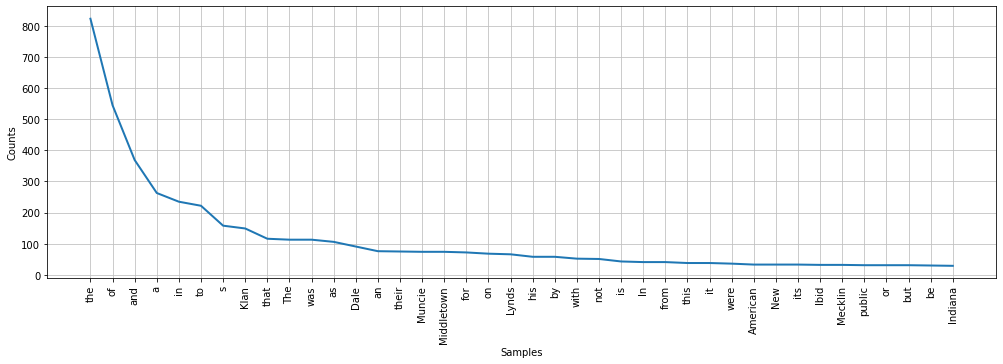

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [9]:
plt.figure(figsize=(17,5))
fdist.plot(40)

In [10]:
stop_words=set(stopwords.words("english"))
print(stop_words)

{'few', 's', 'don', 'once', 'only', "mustn't", 'wasn', 'what', 'here', 'your', 'll', "she's", 'below', 'needn', "shouldn't", "hasn't", 'can', 'their', 'ain', 'have', 'being', 'itself', 'had', 'by', 'me', 'a', 'under', 'hers', 'about', "don't", 'do', 'himself', "needn't", 'o', 'than', "hadn't", 'am', 'wouldn', 'our', "isn't", 'then', 'herself', 'to', 'when', 'themselves', "didn't", 'them', 'shan', 'where', 'y', 'myself', 'does', 'her', "wasn't", 'is', 'other', 'some', 'on', 'and', 'any', 'shouldn', 'which', 'further', 'but', "you're", 'm', 'ours', 'off', 'before', 'was', 'in', "doesn't", 'doing', 'up', 'against', 'just', 'how', 'into', "couldn't", 'hasn', 'yourself', 'those', 'the', 'won', 'too', 'd', 'hadn', 'has', 'very', 'for', 'will', 'own', 'my', 'i', 'having', 'its', "mightn't", 'mustn', 'between', 'at', 'from', 'again', "you'd", 'or', 'did', 'doesn', 'over', 'both', 'why', 'she', 'out', 'after', 'such', 'it', 'while', 'him', 'whom', 'ma', 'now', 'most', "that'll", "it's", "won't"

In [12]:
filtered_review=[]
for w in tokenized_review:
    if w not in stop_words:
        filtered_review.append(w)
# print("Filterd Sentence:",filtered_review)

In [13]:
print(len(tokenized_review))
print(len(filtered_review))

11715
7315


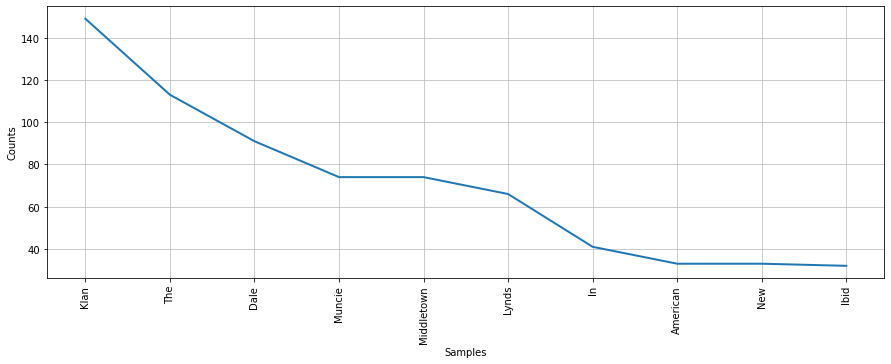

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [15]:
fdist = FreqDist(filtered_review)
plt.figure(figsize=(15,5))
fdist.plot(10)